In [1]:
%matplotlib inline
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt

In [2]:
#dir_name = 'Split-IC-7rvir'
dir_name = '.'
num = 26813
dsname = 'output_0000'
#num = 1405450
fp = h5.File('%s/initial_particle_positions-%d-%s.h5' % (dir_name, num, dsname), 'r')
pos = fp['particle_position'][:]
fp.close()

In [5]:
rmin = pos.min(0)
rmax = pos.max(0)
width = rmax - rmin
maxwidth = width.max()
center = 0.5 * (rmin + rmax)
ledge = center - 0.5*maxwidth
redge = center + 0.5*maxwidth
print(ledge, redge, center, width)

[0.48719203 0.39979125 0.41852383] [0.63436075 0.54695997 0.56569255] [0.56077639 0.47337561 0.49210819] [0.0871928  0.14716872 0.05667623]


In [69]:
factor = 3
com = pos.mean(axis=0)
pos_std = pos.std(axis=0)
radius = factor * pos_std.max()
print(com)
print(radius)

[0.54643776 0.43513759 0.49048357]
0.07266741059969109


In [70]:
pixels = 32

0.5171799884267118 0.6043727897786725
0.3997912459687725 0.5469599685117373
0.5464377590649656 0.4351375872063341
[[np.float64(0.48719202783120974), np.float64(0.6343607503741745)], [np.float64(0.3997912459687726), np.float64(0.5469599685117373)]]
(np.float64(0.5464377590649666), np.float64(0.4351375872063331)) 0.07266741059969109


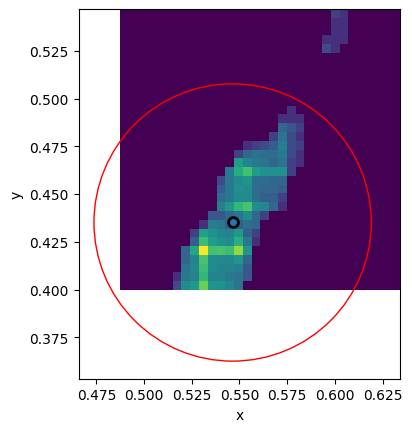

0.3997912459687725 0.5469599685117373
0.4637700711021451 0.5204463025814114
0.4351375872063341 0.4904835688421893
[[np.float64(0.3997912459687726), np.float64(0.5469599685117373)], [np.float64(0.4185238255702959), np.float64(0.5656925481132606)]]
(np.float64(0.4351375872063331), np.float64(0.4904835688421888)) 0.07266741059969109


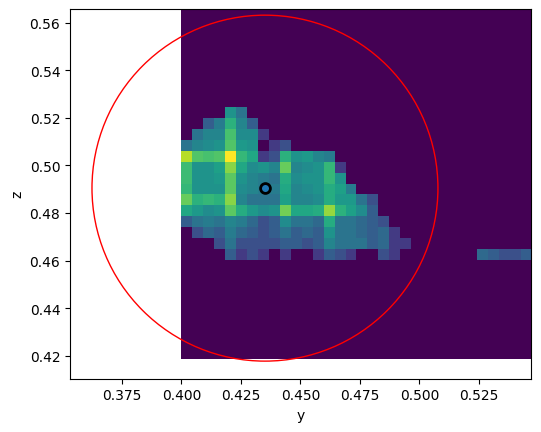

0.4637700711021451 0.5204463025814114
0.5171799884267118 0.6043727897786725
0.4904835688421893 0.5464377590649656
[[np.float64(0.4185238255702959), np.float64(0.5656925481132606)], [np.float64(0.48719202783120974), np.float64(0.6343607503741745)]]
(np.float64(0.4904835688421888), np.float64(0.5464377590649666)) 0.07266741059969109


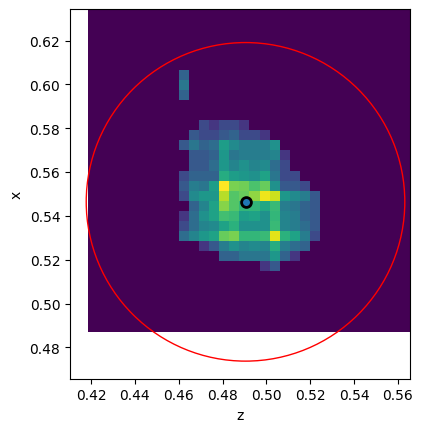

In [71]:
axes = ((0,1), (1,2), (2,0))
for axis in axes:
    extent = [[ledge[axis[0]], redge[axis[0]]], [ledge[axis[1]], redge[axis[1]]]]
    H, xedges, yedges = np.histogram2d(pos[:,axis[0]], pos[:,axis[1]], bins=pixels, range=extent)
    image = -1 * np.ones((pixels, pixels))
    nz = np.nonzero(H)
    fig, ax = plt.subplots(1,1)
    ax.imshow(np.sqrt(H.T), origin='lower', interpolation='nearest', extent=[extent[0][0], extent[0][1], extent[1][0], extent[1][1]])
    ax.scatter(com[axis[0]], com[axis[1]], marker='o', s=50, lw=2, edgecolor='k', c='C0')
    ax.set_xlabel('%c' % (axis[0]+120))
    ax.set_ylabel('%c' % (axis[1]+120))
    circle = plt.Circle((com[axis[0]], com[axis[1]]), radius, color='r', fill=False)
    print(pos[:,axis[0]].min(), pos[:,axis[0]].max())
    print(pos[:,axis[1]].min(), pos[:,axis[1]].max())
    print(pos[:,axis[0]].mean(), pos[:,axis[1]].mean())
    print(extent)
    print((com[axis[0]], com[axis[1]]), radius)
    ax.add_patch(circle)
    plt.show()

In [72]:
radius

np.float64(0.07266741059969109)

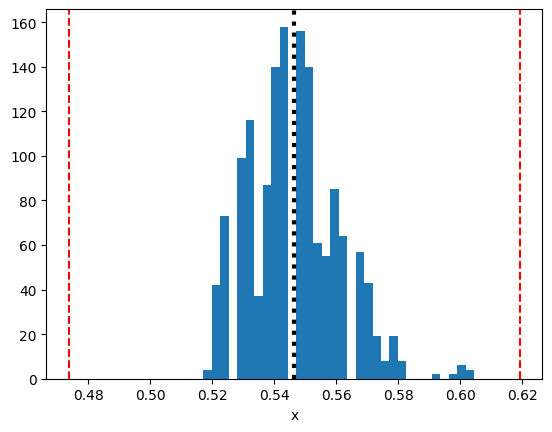

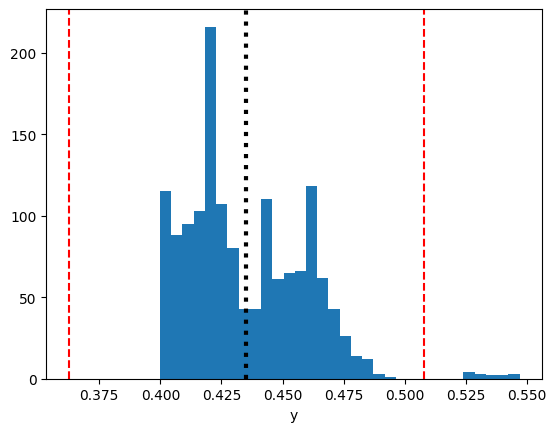

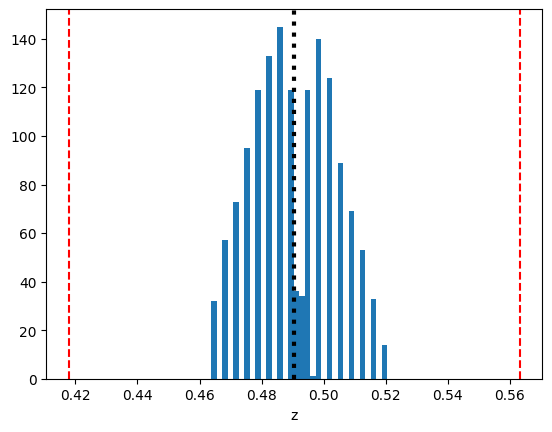

In [74]:
for i in range(3):
    plt.hist(pos[:,i], bins=pixels)
    plt.axvline(pos[:,i].mean(), lw=3, ls=':', c='k')
    plt.axvline(pos[:,i].mean()-radius, lw=1.5, ls='--', c='r')
    plt.axvline(pos[:,i].mean()+radius, lw=1.5, ls='--', c='r')
    plt.xlabel('%c' % (120+i))
    plt.show()